# difference

In [18]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import os

In [58]:
os.getcwd()

'/home/jovyan/work/hangman/Notebook/crack_segmentation'

In [89]:
test_path = '/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/test/'
image_path = test_path + 'images/'
mask_path = test_path + 'masks/'

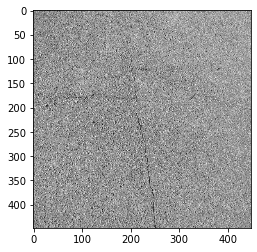

In [141]:
 # Read image
    
image_list = os.listdir(image_path)
im = pilimg.open(image_path + 'cracktree200_6327.jpg')
 
# Fetch image pixel data to numpy array
pix = np.array(im)
 
plt.imshow(pix)

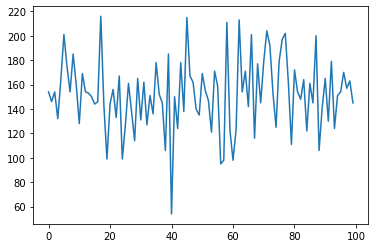

In [142]:
plt.plot(pix[150,150:250,0])

# skeletonize

In [1]:
import os
import numpy as np
import cv2 as cv
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
from skimage.util import invert
import PIL.Image as pilimg

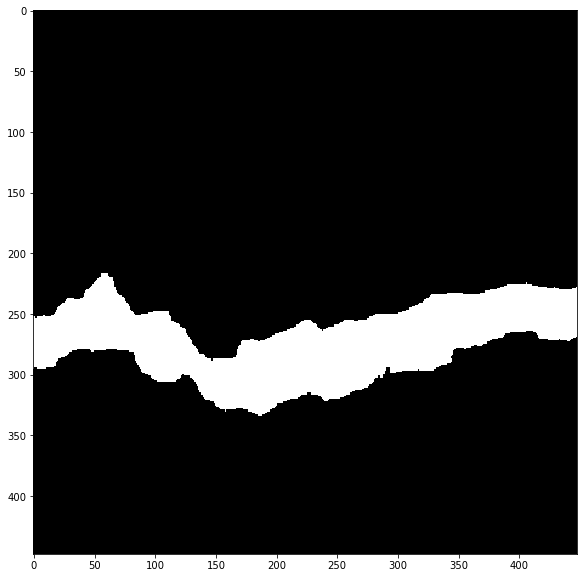

In [2]:
exp_img_path = '/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/masks/DeepCrack_11301-4.jpg'

im = pilimg.open(exp_img_path)

pix = np.array(im)/255
pix = np.where(pix>0.5,1,0)

plt.figure(figsize = (10,10))
plt.imshow(pix, cmap='gray')

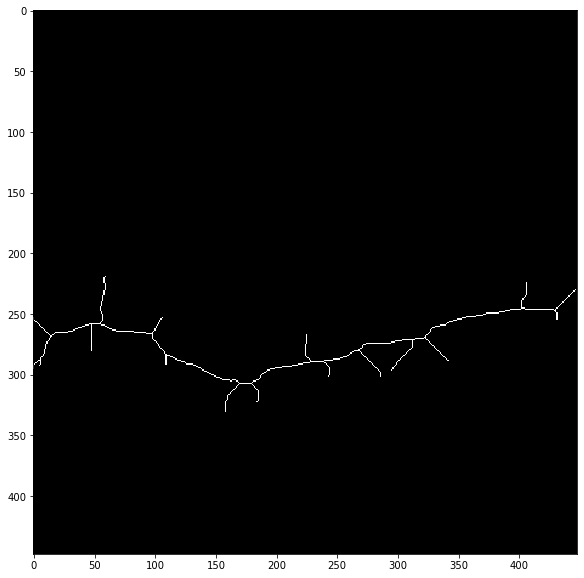

In [5]:
skeleton = skeletonize(pix)

plt.figure(figsize = (10,10))
plt.imshow(skeleton, cmap='gray')

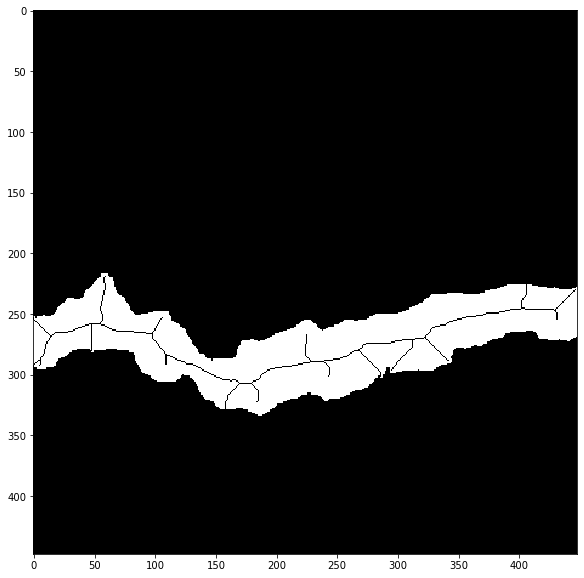

In [99]:
plt.figure(figsize = (10,10))
plt.imshow(pix + (1 - skeleton), cmap='gray')

In [100]:
# 이진화된 결과를 dist_transform 함수의 입력으로 사용합니다. 
dist_transform = cv.distanceTransform(pix.astype(np.uint8), cv.DIST_L2, 5)

# dist_transform  함수를 사용하면 실수 타입(float32)의 이미지가 생성됩니다. 화면에 보여주려면 normalize 함수를 사용해야 합니다. 
result = cv.normalize(dist_transform, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)

In [102]:
answer = dist_transform * skeleton

In [105]:
unique, counts = np.unique(answer, return_counts=True)
dict(zip(unique, counts))

{0.0: 199963,
 1.0: 8,
 1.4: 5,
 2.0: 3,
 2.1969: 7,
 2.8: 4,
 3.0: 6,
 3.1969: 4,
 3.5969: 3,
 4.0: 3,
 4.1969: 5,
 4.2: 1,
 4.3938: 1,
 4.9968996: 2,
 5.0: 3,
 5.1969: 3,
 5.3938: 3,
 5.6: 1,
 5.7938: 1,
 6.0: 3,
 6.1969: 3,
 6.3938: 2,
 6.3968997: 1,
 6.5906997: 3,
 7.0: 2,
 7.1937995: 3,
 7.1969: 3,
 7.3938: 2,
 7.9907: 3,
 8.0: 4,
 8.196899: 2,
 8.3938: 3,
 8.5907: 2,
 8.5938: 1,
 8.7876: 1,
 9.0: 3,
 9.196899: 1,
 9.390699: 1,
 9.3938: 1,
 9.5907: 3,
 9.7876: 5,
 9.993799: 2,
 10.0: 5,
 10.187599: 5,
 10.196899: 1,
 10.393799: 4,
 10.5907: 5,
 10.596899: 2,
 10.7876: 4,
 10.790699: 2,
 10.984499: 2,
 11.0: 4,
 11.196899: 4,
 11.393799: 3,
 11.587599: 1,
 11.5907: 1,
 11.7876: 1,
 11.984499: 2,
 11.996899: 1,
 12.0: 5,
 12.190699: 1,
 12.196899: 1,
 12.384499: 3,
 12.393799: 3,
 12.590698: 2,
 12.599998: 1,
 12.7876: 1,
 12.984499: 1,
 13.0: 5,
 13.181398: 4,
 13.393799: 2,
 13.396898: 1,
 13.590698: 2,
 13.784498: 3,
 13.984499: 2,
 13.999998: 1,
 14.0: 4,
 14.181398: 3,
 14.1937

In [ ]:
fig, ax = plt.subplots(figsize=(400,400))

ax.matshow(answer, cmap=plt.cm.Reds)
ax.matshow(pix, cmap='gray', alpha=0.5)

for i in range(448):
    for j in range(448):
        if answer[j,i] == 0.0:
            continue
        c = answer[j,i]
        ax.text(i, j, str(round(c, 2)), va='center', ha='center', fontsize=12)

# Save the full figure...
fig.savefig('test.png')

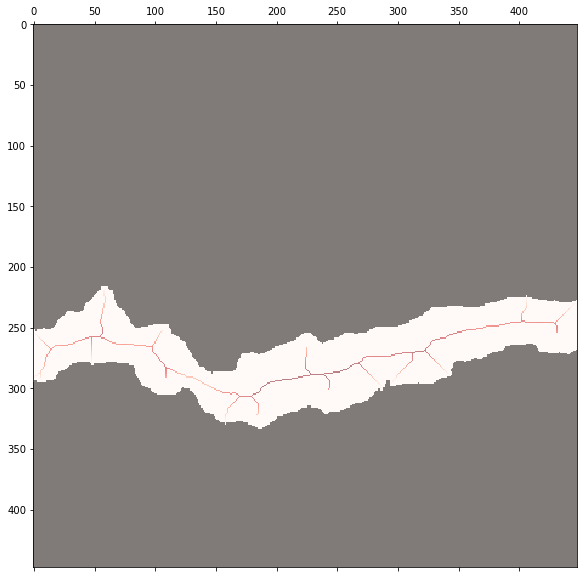

In [145]:
fig, ax = plt.subplots(figsize=(10,10))

ax.matshow(answer, cmap=plt.cm.Reds)
ax.matshow(pix, cmap='gray', alpha=0.5)

# for i in range(448):
#     for j in range(448):
#         if answer[j,i] == 0.0:
#             continue
#         c = answer[j,i]
#         ax.text(i, j, str(round(c, 2)), va='center', ha='center', fontsize=12)

# Save the full figure...
fig.savefig('test.png')

# My Idea

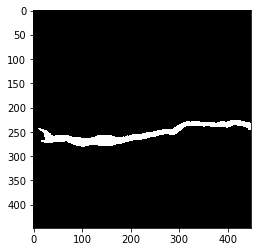

In [69]:
exp_path = 'test_results/exp02_0.5/'
mask_path = exp_path + 'pred/'

 # Read image
    
mask_list = os.listdir(mask_path)
im = pilimg.open(mask_path + mask_list[1])
 
# Fetch image pixel data to numpy array
pix = np.array(im)/255
pix = np.where(pix>0.5,1,0)

plt.imshow(pix, cmap='gray')

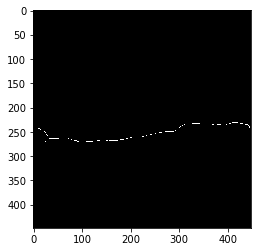

In [71]:
skeleton = skeletonize(pix)

plt.imshow(skeleton, cmap='gray')

In [79]:
# y_pred

print('the width of the crack:',
      round(np.sum(pix)/np.sum(skeleton),3))

the width of the crack: 13.118


In [87]:
np.sum(pix,axis=0)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5,  6,
        9,  8, 10, 11, 13, 18, 19, 21, 26, 27, 27, 26, 26, 24, 23, 22, 21,
       21, 21, 19, 18, 18, 16, 16, 15, 14, 14, 14, 14, 15, 15, 15, 15, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14,
       13, 14, 14, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 18,
       17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17,
       17, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 16, 15, 15, 16, 16, 17, 17, 17, 18, 18, 19, 21, 21, 22, 22, 22,
       22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 20, 20, 19, 19, 17, 16,
       16, 16, 15, 15, 16, 16, 16, 16, 16, 16, 16, 14, 15, 14, 15, 14, 14,
       14, 13, 12, 13, 13, 14, 14, 14, 13, 13, 12, 13, 13, 12, 13, 13, 14,
       14, 13, 13, 13, 12, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 14, 13

In [86]:
# y_true

np.mean(np.sum(pix,axis=0))

13.439732142857142